# __THE TELCO CHURN CHALLENGE FOR REXEL__

## 1. Introduction

The objective of this challenge is to prevent customer to stop using TELCO Inc phoning services.

There are many reasons why customers may churn. It's crucial to detect those customers before they leave.

One of the most effective way to achive that goal is to use the data.

Based on historical data, we are going to detect customers who may leave and suggest actions that can avoid the leaving.

## 2. The data

We have 2 datasets to achieve the challenge. _The training dataset_, will be use to train, test and evaluate machine learning models. The validation dataset is for the final submission of the challenge.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/training.csv', na_values=[" "])

In [2]:
print("The dataset shape: ", data.shape)

The dataset shape:  (11981, 19)


The data we have for this challenge has __11981__ rows and __19__ columns (or variables). Let's visualize the first 6 rows of the data:

In [3]:
data.head().T

,0,1,2,3,4
CUSTOMER_ID,C100000,C100001,C100006,C100008,C100010
COLLEGE,zero,one,zero,zero,one
DATA,660,317.647,208.696,265.018,440
INCOME,19995,31477,66742,40864,43321.5
OVERCHARGE,0,155,0,183,200
LEFTOVER,0,15,13,0,0
HOUSE,897338,393396,937197,986430,394622
LESSTHAN600k,False,True,False,False,True
CHILD,4,0,4,3,2
JOB_CLASS,3,1,2,3,3


In [4]:
data.dtypes

CUSTOMER_ID                     object
COLLEGE                         object
DATA                           float64
INCOME                         float64
OVERCHARGE                       int64
LEFTOVER                         int64
HOUSE                          float64
LESSTHAN600k                    object
CHILD                            int64
JOB_CLASS                        int64
REVENUE                        float64
HANDSET_PRICE                    int64
OVER_15MINS_CALLS_PER_MONTH      int64
TIME_CLIENT                    float64
AVERAGE_CALL_DURATION            int64
REPORTED_SATISFACTION           object
REPORTED_USAGE_LEVEL            object
CONSIDERING_CHANGE_OF_PLAN      object
CHURNED                         object
dtype: object

### 2.1 The data description

* CUSTOMER_ID: A unique customer identifier (categorical)
* COLLEGE: (one or zero), is the customer college educated ? (categorical)
* DATA: Monthly data consumption in Mo (numerical)
* INCOME: Annual salary of the client (numerical)
* OVERCHARGE:Average overcharge per year (numerical)
* LEFTOVER: Average number of leftover minutes per month (numerical)
* HOUSE: Estimated value of the house (numerical)
* LESSTHAN600k: Is the value of the house smaller than 600K ? (catagorical)
* CHILD: The number of children (numerical)
* JOB_CLASS: Self reported type of job (categorical)
* REVENUE: Annual phone bill (numerical)
* HANDSET_PRICE: The price of the handset (phone) (numerical)
* OVER_15MINS_CALLS_PER_MONTH: Average number of long calls (more than 15 minutes) (numerical)
* TIME_CLIENT: The tenure in year (numerical)
* AVERAGE_CALL_DURATION: The average duration of a call (numerical)
* REPORTED_SATISFACTION: The reported level of satisfaction (categorical)
* REPORTED_USAGE_LEVEL: The self reported usage level (categorical)
* CONSIDERING_CHANGE_OF_PLAN: Self reported consideration whether to change operator (categorical)
* CHURNED: Did the customer stay or leave. This is the class (categorical)

Let's convert each variable in the appropriate data type:

In [5]:
data['CUSTOMER_ID'] = pd.Categorical(data['CUSTOMER_ID'])
data['COLLEGE'] = pd.Categorical(data['COLLEGE'])
data['LESSTHAN600k'] = pd.Categorical(data['LESSTHAN600k'])
data['JOB_CLASS'] = pd.Categorical(data['JOB_CLASS'])
data['REPORTED_SATISFACTION'] = pd.Categorical(data['REPORTED_SATISFACTION'])
data['REPORTED_USAGE_LEVEL'] = pd.Categorical(data['REPORTED_USAGE_LEVEL'])
data['CONSIDERING_CHANGE_OF_PLAN'] = pd.Categorical(data['CONSIDERING_CHANGE_OF_PLAN'])
data['CHURNED'] = pd.Categorical(data['CHURNED'])

### 2.2 The data quality

Before starting any analysis, it's important to guarantee the quality of the data. Especially, we are going to check if there are missing values:

In [6]:
data.isna().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64

There are 2 variables with missing values: HOUSE (the house value) and the LESSTHAN600K (is the house value smaller or higher tha 600K ?). 
 

__What is the type of the missing values ?__

In [7]:
# We retain only rows with missing values for the variable HOUSE
dataNa = data[data['HOUSE'].isna()]
lessthan600k = dataNa['LESSTHAN600k']

# The percentage of missing values in the column LESSTHAN600K
100*lessthan600k.isna().sum()/lessthan600k.shape[0]

100.0

The variable __LESSTHAN600K__ has missing values because the house were not estimated.

Let's evaluate the percentage of missing values in the whole data set:

In [8]:
100*lessthan600k.shape[0]/data.shape[0]

5.3000584258409145

There are only __5.3%__ of rows with a missing value.

We can then drop all the rows with missing values without introducing a biais in the data.

In [9]:
data = data.dropna()

In [10]:
data.isna().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURNED                        0
dtype: int64

## 3. __Data exploratory analysis__

Before the modeling, it's important to dive deep inside the data, to highlith the link or correlation between varaiables.

### 3.1 The class variable exploration (CHURNED)

First, we check if the data is unbalanced:

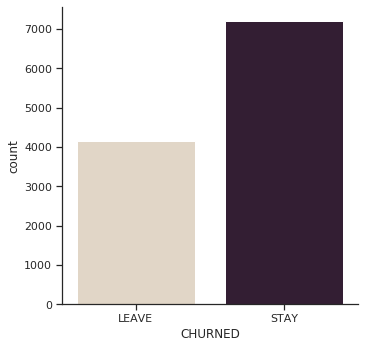

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="CHURNED", kind="count", palette="ch:.25", data=data);

In [12]:
stay = data[data['CHURNED'] == 'STAY'].shape

percent  = stay[0]*100/data.shape[0]
print("STAY percentage: ", round(percent,2),'%')
print("LEAVE percentage: ", round(100-percent,2),'%')

STAY percentage:  63.47 %
LEAVE percentage:  36.53 %


The data is __unbalanced__. The main risk is to build an overfitted model. To avoid this, the training data will be created with a stratify partionning.

### 3.2 Numeric variables

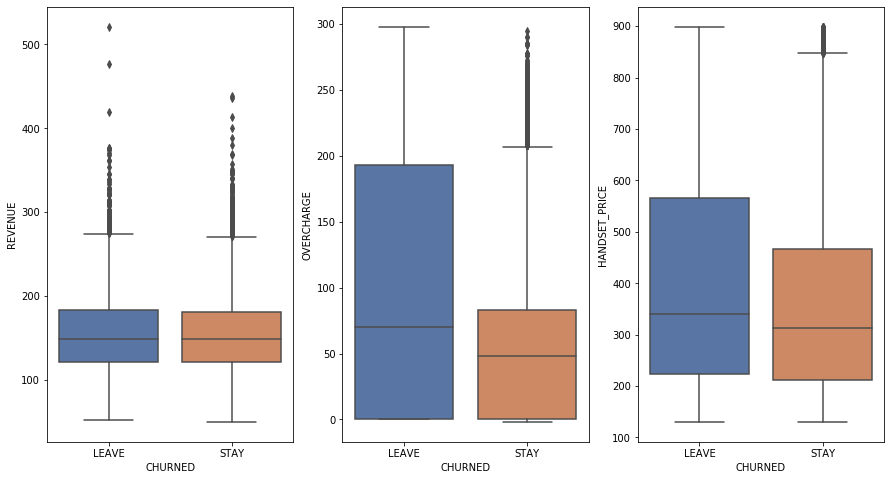

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,8))
sns.set(style="ticks", color_codes=True)

sns.boxplot(x="CHURNED", y="REVENUE", data=data,  ax=ax1)
sns.boxplot(x="CHURNED", y="OVERCHARGE", data=data, ax=ax2);
sns.boxplot(x="CHURNED", y="HANDSET_PRICE",  data=data, ax=ax3);

The first boxplot shows that, there is not a difference for the revenue (the median), customer who leave or stay have the same revenue per year.

The second shows, customers who leaves are more overcharged (the median) than customers who stays.

The handset price of customer who leave are more expensive than the ones of people who stay.

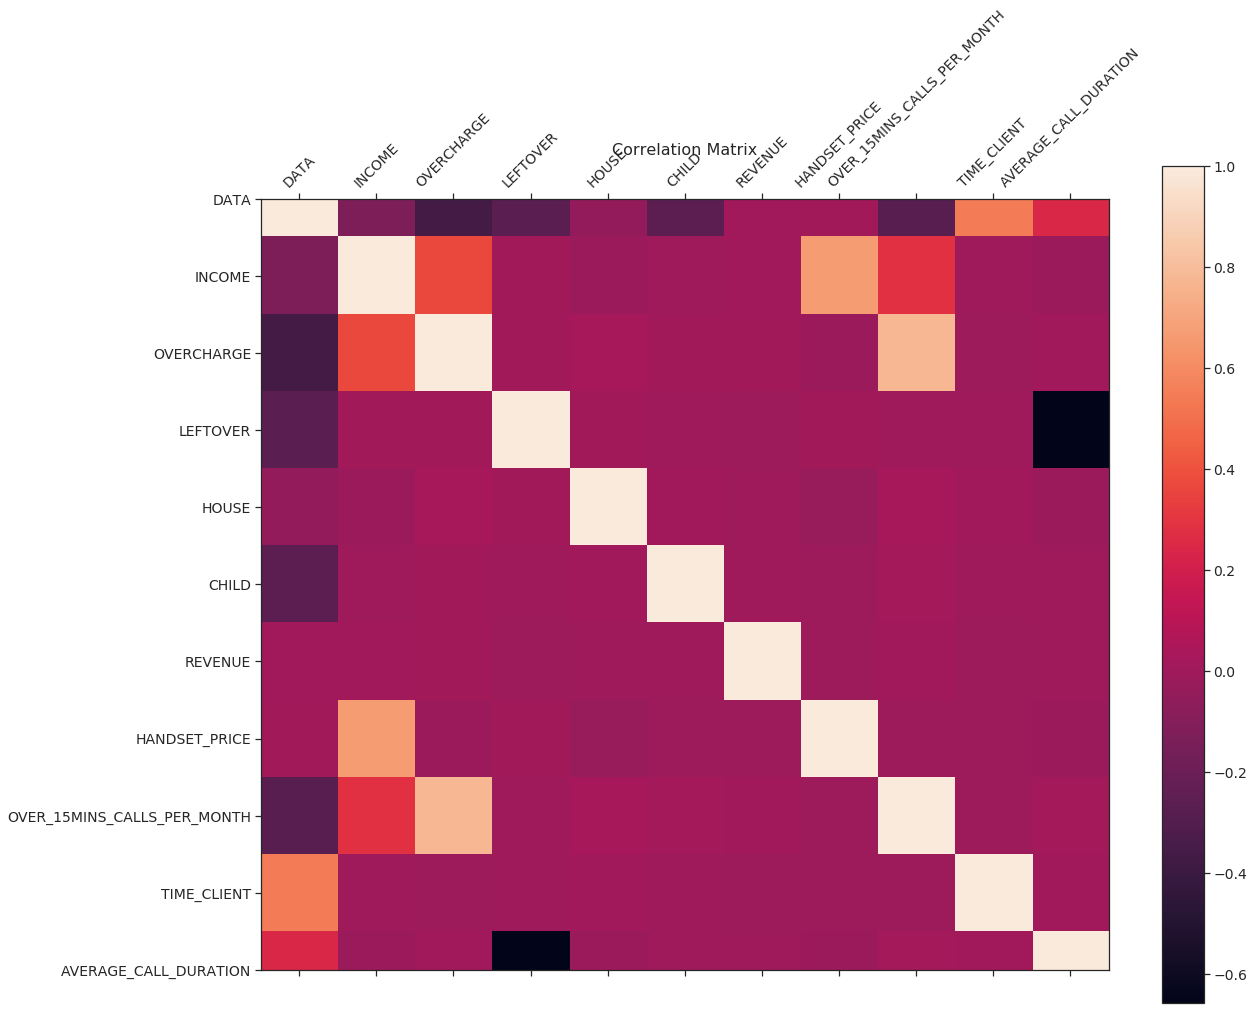

In [14]:
dataNumeric = data.select_dtypes(exclude='category')
numericCorr = dataNumeric.corr(method='pearson')
f= plt.figure(figsize=(19, 15))
plt.matshow(numericCorr, fignum=f.number)
plt.xticks(range(dataNumeric.shape[1]), dataNumeric.columns, fontsize=14, rotation=45)
plt.yticks(range(dataNumeric.shape[1]), dataNumeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

We can draw some observations according to the table above:
There is a strong correlation between:

* __HANDSET_PRICE__ and __INCOME__
* __OVERCHARGE__ and __OVER_15MINS_CALLS_PER_MONTH__ (average number of long calls)


### 3.3 Categorical variables

The __Multiple Component Analysis (ACM)__ is a categorical data analysis method. The method is based on the factorial analysis principles. The goal is to find the main directions that maximizes the variance in the data

In [15]:
dataCat = data.select_dtypes(include='category')
del dataCat['CUSTOMER_ID']
dataCat.describe().T

,count,unique,top,freq
COLLEGE,11346,2,zero,5708
LESSTHAN600k,11346,2,True,7157
JOB_CLASS,11346,4,4,2898
REPORTED_SATISFACTION,11346,5,very_unsat,5111
REPORTED_USAGE_LEVEL,11346,5,little,4455
CONSIDERING_CHANGE_OF_PLAN,11346,5,considering,4729
CHURNED,11346,2,STAY,7201


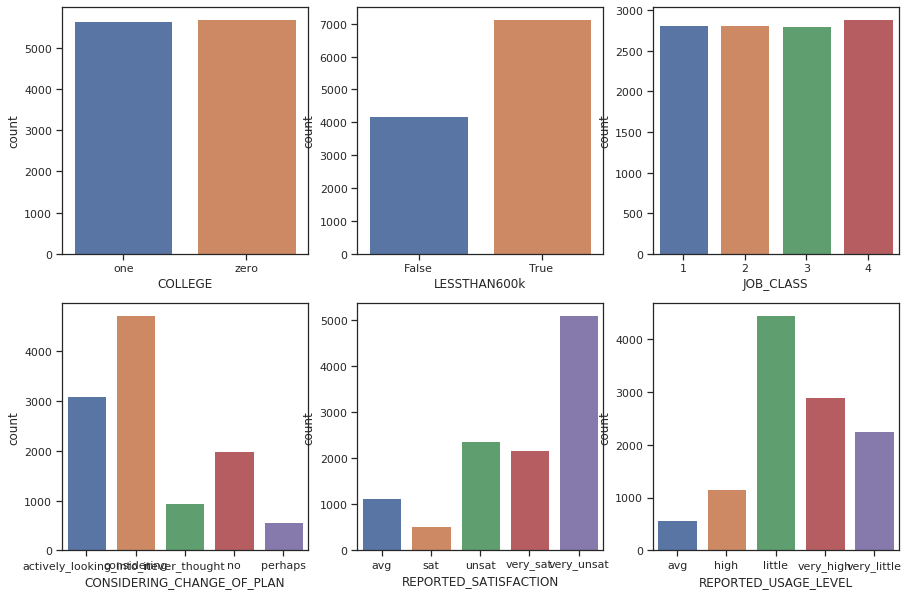

In [16]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = dataCat, x = 'COLLEGE', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = dataCat, x = 'LESSTHAN600k', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = dataCat, x = 'JOB_CLASS', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = dataCat, x = 'CONSIDERING_CHANGE_OF_PLAN' , ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = dataCat, x = 'REPORTED_SATISFACTION', ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.countplot(data = dataCat, x = 'REPORTED_USAGE_LEVEL', ax=ax6)

There are the same number of customers who went to college and those who were not. 
Is there any link between the customers who leaves and those who went or not to college ? 

* Independance test (or __Chi Square test__) between __CONSIDERING_CHANGE_OF_PLAN__ and __LESSTHAN600k__: 

Ho: The variables __CONSIDERING_CHANGE_OF_PLAN__ and __LESSTHAN600k__ are indenpendant

Ha: The variables are linked


In [20]:
from scipy.stats import chi2_contingency

def chi2Test(contengencyTable):
    chi2, pvalue, dof, expected = chi2_contingency(contengencyTable)
    print("X-squered:", chi2, "p-Value:",pvalue, "degrees of freedom:", dof)

In [25]:
observedData = pd.crosstab(dataCat['CONSIDERING_CHANGE_OF_PLAN'], dataCat['LESSTHAN600k'], margins=False)
chi2Test(observedData)

X-squered: 12.829764464101387 p-Value: 0.0121382562672965 degrees of freedom: 4


As the __p-Value__ is less than 0.05, then we rejet the null hypothesis (Ho). There is a link (a correlation) between __CONSIDERING_CHANGE_OF_PLAN__ and __LESSTHAN600k__.

* What about the link between __REPORTED_SATISFACTION__ and __REPORTED_SATISFACTION__ ?

In [28]:
observedData = pd.crosstab(dataCat['REPORTED_USAGE_LEVEL'], dataCat['REPORTED_SATISFACTION'], margins=False)
chi2Test(observedData)

X-squered: 28.982540280873717 p-Value: 0.024054114930413394 degrees of freedom: 16


The __p-Value__ is less than 0.05. We can rejet the hypothesis that, __REPORTED_USAGE_LEVEL__ and __REPORTED_SATISFACTION__ are independant. That means there is a link between __REPORTED_USAGE_LEVEL__ and __REPORTED_SATISFACTION__

### 3.3 Data exploratory analysis conclusion

The data exploratory analysis highlights the main features of the data. We are aware of that:

* The class (CHURNED) is unbalanced: We need to use stratified partinning and stratified cross-validation
* The are correlations between certain numerical variables and there links between certain categorical variables

## 4. Modeling

In this part, we are going to train many machine learning models. Here are the steps we are going to follow:

* Data partioning: We are going split data in 3 parts. The training data (for model training), the test data (for model testing) and the validation data (for model comparison)
* The training and testing of machine learning models: We will be using the cross-validation with folds
* The validation and selection of the best model based on the Air Under Curve of the ROC curve

### 4.1 The data sampling

We mentionned that, the class (CHURNED) was unbalanced. We use the __stratify sampling__ to maintain the two subgroups (LEAVE and STAY) in all partion.

In [33]:
from sklearn.model_selection import train_test_split

dataset = data.copy()
del dataset['CUSTOMER_ID']

predictors = dataset.loc[:, dataset.columns != 'CHURNED']

#categorical data encoding (one hot)
predictors = pd.get_dummies(predictors)

#Retain only values
X    = predictors.values

outcome      = dataset.loc[:, dataset.columns == 'CHURNED']
outcome  = pd.get_dummies(outcome)
Y         = outcome["CHURNED_LEAVE"]

# The training sample is 60% of the dataset
X_train, XVal_test, y_train, yval_test = train_test_split(X, Y, test_size=0.4, stratify=Y)

#The test sample is 70% of the remaining 40% (= 0.7*0.4=28% of the initial dataset) 
X_test, X_val, y_test, y_val = train_test_split(XVal_test, yval_test, test_size=0.3, stratify=yval_test)

print("The training sample: ", X_train.shape)
print("The test sample: ",X_test.shape)
print("The validation sample: ",X_val.shape)

The training sample:  (6807, 34)
The test sample:  (3177, 34)
The validation sample:  (1362, 34)


### 4.2 The models training

We are going to use many families of models. When there correlations or links between predictors some methods will underperform (linear methods especially). These are the methods we will be training:

* Logistic regression: Linear method, easy to train, will be used to compare others methods
* Gradient boosting
* The decision tree
* Random Forest
* Support vector machine (SVM)
* Multi layer perceptron

For this methods, we will perform the hyper parameters searching with a __Grid search__ and training the models using a cross validation.

Cross validation parameters:

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

CrossValidationFolds = np.array([5, 7, 10, 13, 16, 20])

In [34]:
def myGridSearch(model, grid_params, kfolds, trainX, trainY, testX, testY):
    if model is None or kfolds is None:
        return
    
    BestTrainScore = list()
    TestScores = list()
    TestScoresStd = list()
    auc    = list()
    BestParams  = list()
    maxAuc    = 0
    bestModel = model
    
    # We have many draws:
    for k in kfolds:
        # Model building with a k number of Folds
        gridModel = GridSearchCV(model, grid_params,error_score='raise', cv=k)
        gridModel.fit(trainX, trainY)
        
      
        BestTrainScore.append(gridModel.best_score_)
        TestScores.append(gridModel.score(testX, testY))
        
        # ROC curve and AUC
        predictions = gridModel.predict(testX)
        thisAuc = roc_auc_score(testY,predictions)
        auc.append(thisAuc)
        
        #We retain the best model = the highest AUC
        if thisAuc > maxAuc:
            bestModel = gridModel
            maxAuc = thisAuc
    
    #Display the results in a graphic
    fig, ax = plt.subplots()
    ax.plot(kfolds, BestTrainScore, 'b--', label='Train score')
    ax.plot(kfolds, TestScores, 'r--', label='Test scores')
    ax.plot(kfolds, auc, 'g--', label='AUC')
    leg = ax.legend();
    
    print("Mean train score: %0.2f"%np.mean(BestTrainScore), 
          " / STD train score: %0.2f"% np.std(BestTrainScore), 
          " / Max train score: %0.2f"% np.max(BestTrainScore),
          " / Min train score: %0.2f"% np.min(BestTrainScore))
    print("Mean test score: %0.2f"%np.mean(TestScores), 
          " / STD test score: %0.2f"% np.std(TestScores), 
          " / Max test score: %0.2f"% np.max(TestScores), 
          " / Min test score: %0.2f"% np.min(TestScores))
    print("Mean AUC: %0.2f"% np.mean(auc), 
          " / Std AUC: %0.2f"% np.std(auc), 
          " / Max AUC: %0.2f"% maxAuc, 
          " / Min AUC: %0.2f"% np.min(auc))
    
    return bestModel

*  __The Logistic regression__

Mean train score: 0.69  / STD train score: 0.00  / Max train score: 0.70  / Min train score: 0.69
Mean test score: 0.69  / STD test score: 0.00  / Max test score: 0.69  / Min test score: 0.68
Mean AUC: 0.63  / Std AUC: 0.00  / Max AUC: 0.63  / Min AUC: 0.62
Les meilleurs paramètres:  {'C': 0.005, 'max_iter': 50, 'tol': 1e-05}


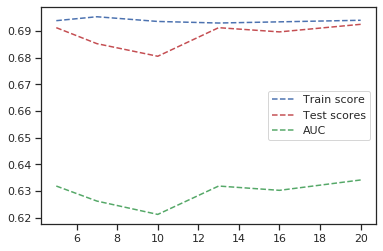

In [37]:
from sklearn.linear_model import LogisticRegression

grid_params = {
    'C': [0.001, 0.005, 0.01, 0.05, 1,1.5],
    'tol': [1e-5,1e-4,1e-3,1e-2,1e-1],
    "max_iter": [50,100,200,300]
}

lr = LogisticRegression(solver = 'liblinear',verbose=0)
modelLR = myGridSearch(lr, grid_params, CrossValidationFolds, X_train, y_train, X_test, y_test)
print("The best hyper parameters values: ", modelLR.best_params_)

* __The gradient boosting__

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grid_params = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.0001,0.001,0.1],
    "n_estimators": [100,200,300],
    "max_depth": [2,3,5,10]
}

gb = GradientBoostingClassifier(verbose=0)
modelGB = myGridSearch(gb, grid_params, CrossValidationFolds, X_train, y_train, X_test, y_test)
print("The best hyper parameters values: ", modelGB.best_params_)

* __The decision tree__

In [ ]:
from sklearn import tree

tr = tree.DecisionTreeClassifier()
grid_params = {'criterion': ['gini', 'entropy'],"max_depth": [1, 2, 3, 4, 5, 6, 7,8,10], "min_samples_split": [2, 3, 5, 10, 15, 20]}
modelTree = myGridSearch(tr, grid_params, CrossValidationFolds, X_train, y_train, X_test, y_test)

print("The best hyper parameters values: ",modelTree.best_params_)

* __The random Forest__

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(verbose = 0)

grid_params = {"n_estimators": [20,50, 100,200,300],
               "criterion": ['gini', 'entropy'],
               'max_depth': [2,3,5,10],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [2,3,5,10],
               "class_weight": ['balanced', 'balanced_subsample', None]
              }
modelRF = myGridSearch(rf, grid_params, CrossValidationFolds, X_train, y_train, X_test, y_test)
print("The best hyper parameters values: ",modelRF.best_params_)